<a href="https://colab.research.google.com/github/vrose99/ds4bme/blob/master/Quiz2_vrose9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tori Rose
### Data Science Quiz 2
#### 11 September 2019
#### vrose9

![alt text](https://drive.google.com/file/d/1ry0KhB5gfjqDk4hkFzcEzYSF1t6Q9YRD/view?usp=sharing)

In [0]:
# Import libraries

import numpy as np
import math
from scipy import stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [5]:
# Import Data

! if [ ! -e kirby21.csv ]; then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv; fi;

--2019-09-11 23:49:32--  https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1611966 (1.5M) [text/plain]
Saving to: ‘kirby21.csv’

kirby21.csv         100%[===================>]   1.54M  --.-KB/s    in 0.09s   

2019-09-11 23:49:32 (17.7 MB/s) - ‘kirby21.csv’ saved [1611966/1611966]



In [65]:
# Make a data Frame

df = pd.read_csv("kirby21.csv")

df_L = df.loc[df['roi']=='Diencephalon_L']
df_R = df.loc[df['roi']=='Diencephalon_R']

#df_L.head()
df_R.head()

,Unnamed: 0,rawid,roi,volume,min,max,mean,std,type,level,id,icv,tbv
3,4,kirby127a_3_1_ax.img,Diencephalon_R,9678,10.0,335.0,193.7051,32.7869,1,1,127,1378295,1268519
839,840,kirby142a_3_1_ax.img,Diencephalon_R,9071,56.0,355.0,219.9847,34.1217,1,1,142,1404611,1297277
1675,1676,kirby239a_3_1_ax.img,Diencephalon_R,9004,33.0,333.0,224.5235,32.2017,1,1,239,1223704,1129450
2511,2512,kirby346a_3_1_ax.img,Diencephalon_R,8933,40.0,369.0,228.2285,32.9342,1,1,346,1361902,1294746
3347,3348,kirby422a_3_1_ax.img,Diencephalon_R,9722,64.0,386.0,215.4053,29.7035,1,1,422,1335701,1225587


In [66]:
# Make volume column an array for regression

D_R = df_R['volume'].values
D_L = df_L['volume'].values
D_L

array([ 9683,  9156,  8937,  8828,  9749, 10023,  9315,  8120,  9519,
        8996,  9035,  7066,  9107,  8992,  9072,  8801, 10137,  9552,
        7396,  8634])

In [87]:
# Regression

beta1 = st.pearsonr(D_R, D_L)[0] * np.std(D_L) / np.std(D_R)
beta0 = np.mean(D_L) - np.mean(D_R) * beta1
print('Beta 0 is ',beta0,'; Beta 1 is ', beta1)

Beta 0 is  -694.1809221478507 ; Beta 1 is  1.0675677731655158


In [83]:
n = len(D_R)
total = 0
for i in range(0,n):
  total += math.pow((D_L[i] -  beta0 - beta1*D_R[i]),2)
print('The in sample error rate is', total)


The in sample error rate is 832740.3005383236


Text(0, 0.5, 'Left Diencephalon Volume')

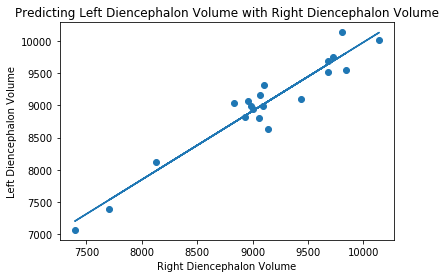

In [76]:
plt.figure()
plt.scatter(D_R, D_L)
plt.plot(D_R, beta0 + beta1 * D_R)
plt.title('Predicting Left Diencephalon Volume with Right Diencephalon Volume')
plt.xlabel('Right Diencephalon Volume')
plt.ylabel('Left Diencephalon Volume')